In [ ]:
library(Seurat)
library(tidyverse)
library(CellChat)
library(patchwork)
library(repr)
library(RColorBrewer)
library(scales)
library(paletteer)
library(readxl)
library(writexl)
library(sjmisc)
#library(ggiraphExtra)
options(stringsAsFactors = FALSE)

library(corrplot)
library(ggpubr)


options(future.globals.maxSize = 5e9)

# load data

In [28]:
scdata=readRDS("/data2/xiangwei/projects/zhaolian/10polyIntegrate/results/sctAnnotationSeuObj")
scdata

An object of class Seurat 
50442 features across 45620 samples within 2 assays 
Active assay: SCT (22704 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 8 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, integrated.rpca, integrated.harmony, umap.cca, umap.rpca, umap.harmony

In [29]:
head(scdata@meta.data)

,nCount_RNA,nFeature_RNA,sampleID,percent.mt,Phase,sampleType,sampleTypeFine,nCount_SCT,nFeature_SCT,unintegrated_clusters,seurat_clusters,cca_cluster,rpca_cluster,harmony_cluster,main,fine
,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<chr>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
WT_1.bcHTXJ,5633,2155,WT1,3.586011,G1,normal,WT1,2575,1386,8,10,16,10,10,Epithelial,Epi-Krt20
WT_1.bcHGRE,10487,3855,WT1,5.912082,G2M,normal,WT1,2180,1408,8,11,0,9,11,Epithelial,Epi-Srgn
WT_1.bcHIFA,9429,3137,WT1,6.352742,G2M,normal,WT1,2197,1152,8,10,16,10,10,Epithelial,Epi-Krt20
WT_1.bcHFJN,7902,2746,WT1,7.884080,G1,normal,WT1,2205,1178,8,10,16,10,10,Epithelial,Epi-Krt20
WT_1.bcGOTP,7605,3330,WT1,4.865220,S,normal,WT1,2136,1383,20,0,11,22,0,Neutrophil,Neutrophil
WT_1.bcFBTL,8837,2901,WT1,6.551997,G1,normal,WT1,2213,1189,8,10,3,10,10,Epithelial,Epi-Krt20


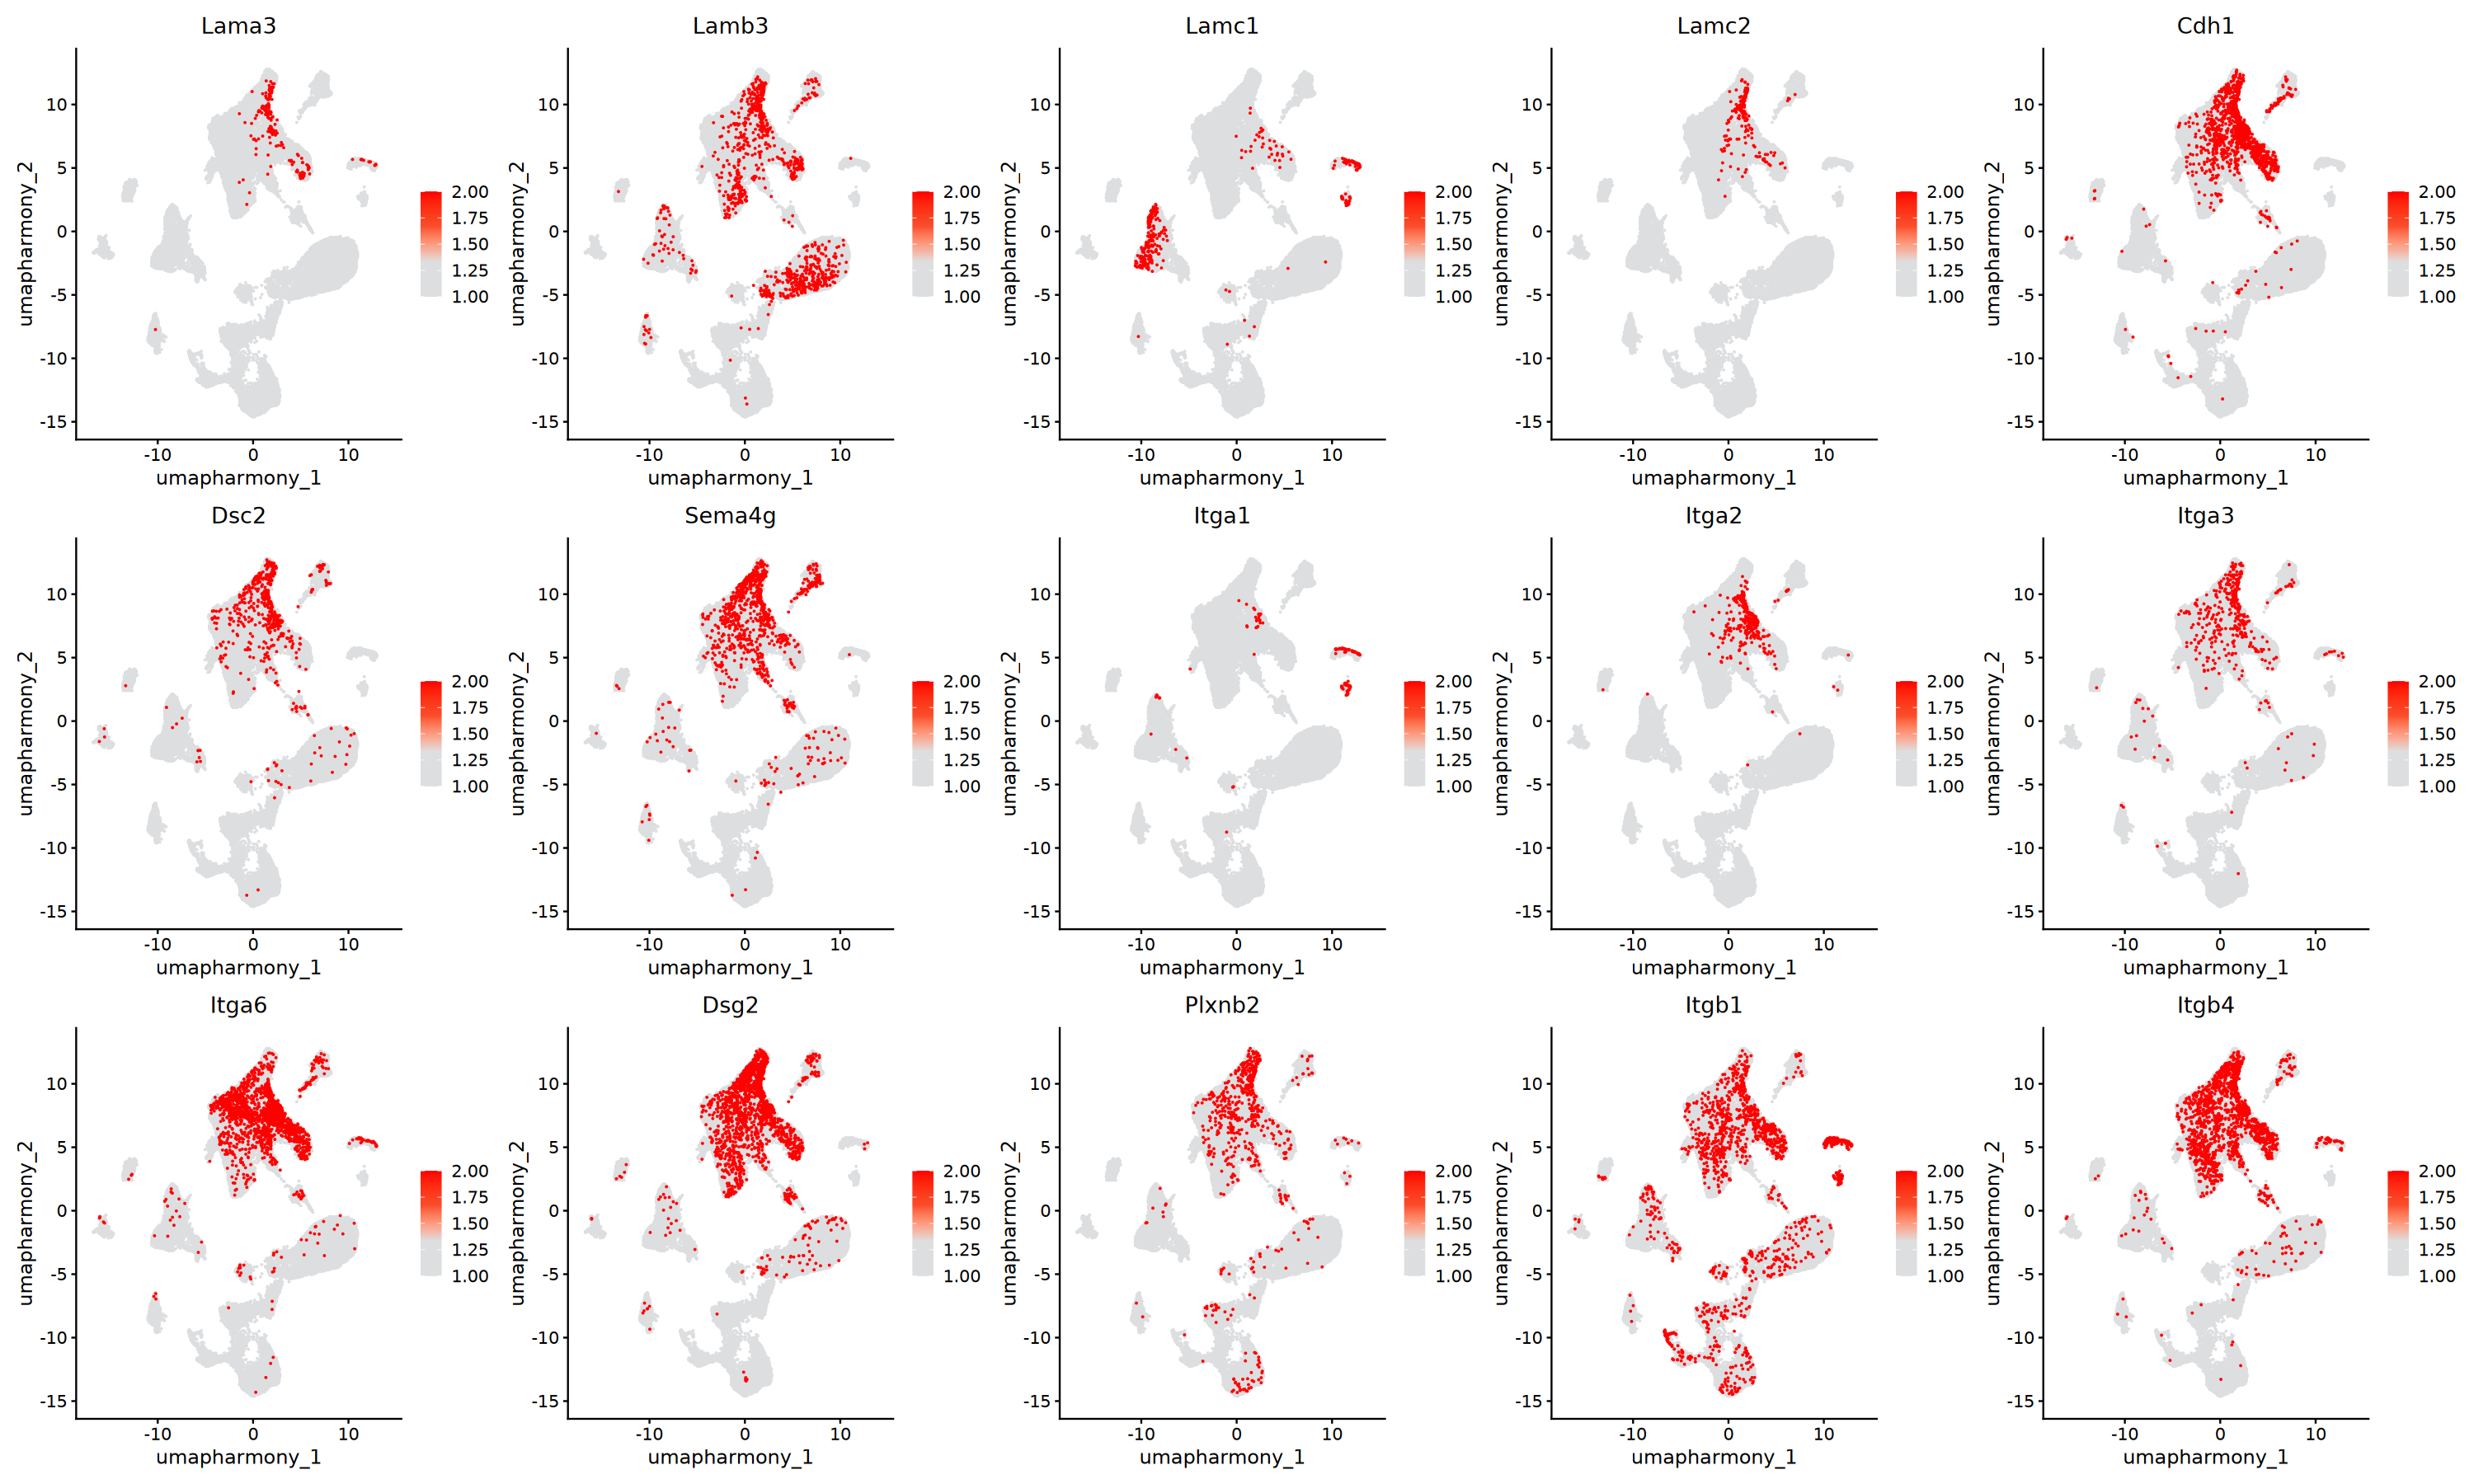

In [30]:
#FA2008C4
options(repr.plot.width=25,repr.plot.height=15)
EMCgenesUMAP=FeaturePlot(scdata, features = c("Lama3","Lamb3","Lamc1","Lamc2","Cdh1","Dsc2","Sema4g",
                                 "Itga1","Itga2","Itga3","Itga6","Dsg2","Plxnb2",
                                 "Itgb1","Itgb4"),
            reduction = "umap.harmony",
            cols = c("#DDDEE0","#DDDEE0","#FA3008DA","red"),
            ncol=5,order=T)

EMCgenesUMAP

In [ ]:
ggsave(EMCgenesUMAP,filename = "results/plot/EMCgenesUMAP.pdf",width = 25,height = 15)

In [7]:
scdata=subset(scdata,main %in% c("Epithelial"))

In [8]:
scdata

An object of class Seurat 
50442 features across 19554 samples within 2 assays 
Active assay: SCT (22704 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 8 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, integrated.rpca, integrated.harmony, umap.cca, umap.rpca, umap.harmony

In [ ]:
scdata$main=as.character(scdata$main)
scdata$fine=as.character(scdata$fine)
sampleID=names(table(scdata$sampleID))
sampleID
cellnum=table(scdata$fine,scdata$sampleID)%>%as.data.frame.array()
cellnum
write.table(cellnum,"results/cellnum.csv",sep = ",")

In [9]:
table(scdata$sampleID)


  148_T1   148_T3 142_T5-4   132_T1   142_T2    18_T3    18_T4    17_T4 
    1076     1252      689     1769     1668     2563     1440     3218 
  151_T4      WT1      WT2 
    3595     1266     1018 

In [10]:
scdata=subset(scdata,sampleID %in%c("WT1","WT2"),invert=T)

In [11]:
table(scdata$sampleID)


  148_T1   148_T3 142_T5-4   132_T1   142_T2    18_T3    18_T4    17_T4 
    1076     1252      689     1769     1668     2563     1440     3218 
  151_T4      WT1      WT2 
    3595        0        0 

In [12]:
cellID=rownames(scdata@meta.data)

In [13]:
scdata@meta.data=scdata@meta.data%>%left_join(npvalue,by="sampleID")

In [14]:
rownames(scdata@meta.data)=cellID

In [15]:
table(scdata$sampleID,scdata$stage)

          
           early late
  132_T1    1769    0
  142_T2    1668    0
  142_T5-4     0  689
  148_T1       0 1076
  148_T3       0 1252
  151_T4    3595    0
  17_T4     3218    0
  18_T3     2563    0
  18_T4     1440    0

# set color

In [ ]:
mainColor=paletteer_d("basetheme::clean")
fineColor=paletteer_d("ggsci::default_ucscgb")

In [ ]:
options(repr.plot.width=10,repr.plot.height=7)
umapmain=DimPlot(scdata,reduction = "umap.harmony",
  group.by = c( "main"), label = T,order=F,pt.size=0.1,cols=mainColor)
umapmain

# get matrixdata

In [ ]:
head(scdata@meta.data)

In [ ]:
sampleMatrixList=vector("list",length = length(sampleID))
sampleMetadataList=vector("list",length = length(sampleID))
names(sampleMatrixList)=sampleID
names(sampleMetadataList)=sampleID

In [ ]:
Idents(scdata)="sampleID"

In [ ]:
for (i in seq_along(sampleMatrixList)){
    sampleMatrix=subset(scdata,idents = sampleID[i])
    cutoff=0.001*ncol(sampleMatrix)#cutoff值，细胞亚群的数量要超过该样本细胞总数的1%
    cutoffCellType=rownames(table(sampleMatrix$fine)%>%as.data.frame.array()%>% set_names("num")%>% filter(num>!!cutoff))#选出细胞数量大于cutoff的细胞亚群名称
    
    Idents(sampleMatrix)="fine"
    selectedMatrix=subset(sampleMatrix,idents = cutoffCellType)#选出符合的细胞
    scaledMatrix=selectedMatrix[["SCT"]]$data
    #GetAssayData(object = selectedMatrix, assay = "SCT", slot = "data")
    
    sampleMatrixList[[i]]=scaledMatrix
    sampleMetadataList[[i]]=selectedMatrix@meta.data
}

In [ ]:
dim(sampleMatrixList[[2]])

In [ ]:
dim(sampleMetadataList[[2]])
head(sampleMetadataList[[2]])

# Create a CellChat object

In [ ]:
cellchatObj=vector("list",length = length(sampleID))
names(cellchatObj)=sampleID
for (i in seq_along(cellchatObj)){
    cellchatObj[[i]]=createCellChat(object = sampleMatrixList[[i]], meta = sampleMetadataList[[i]], group.by = "fine")
}

In [ ]:
for (i in seq_along(sampleID)){
    cellchatObj[[i]]@DB=CellChatDB.mouse
    cellchatObj[[i]] = subsetData(cellchatObj[[i]])
    cellchatObj[[i]] = identifyOverExpressedGenes(cellchatObj[[i]])
    cellchatObj[[i]] = identifyOverExpressedInteractions(cellchatObj[[i]])
    cellchatObj[[i]] = projectData(cellchatObj[[i]], PPI.mouse)
    cellchatObj[[i]] = computeCommunProb(cellchatObj[[i]],raw.use = FALSE,population.size = F)
    df.net = subsetCommunication(cellchatObj[[i]])
    df.netP = subsetCommunication(cellchatObj[[i]],slot.name = "netP")
    write.table(df.net,str_c("results/",sampleID[i],"dfNet.csv"),sep = ",",row.names = F)
    write.table(df.netP,str_c("results/",sampleID[i],"dfNetP.csv"),sep = ",",row.names = F)
    cellchatObj[[i]] = computeCommunProbPathway(cellchatObj[[i]])
    cellchatObj[[i]] = aggregateNet(cellchatObj[[i]])
    
}

In [ ]:
saveRDS(cellchatObj,"results/cellchatObjResPopF")

In [ ]:
cellchatObj=readRDS("results/cellchatObjResPopF")

# sum counts number per sample 

In [ ]:
names(cellchatObj)
countspopF=vector("numeric",length = length(cellchatObj))
for (i in seq_along(countspopF)){
countspopF[i]=sum(cellchatObj[[i]]@net$count)
    }
countspopF

In [ ]:
sampleID

In [ ]:
#pdf("results/plot/circle.pdf",width = 10,height = 10)
groupSize = as.numeric(table(cellchatObj[[1]]@idents))
netVisual_circle(cellchatObj[[1]]@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, 
                 #color.use =celltypeCol,
                 edge.label.cex=T,
                 title.name = str_c(sampleID[1]," Number of interactions"))
netVisual_circle(cellchatObj[[1]]@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, 
                 #color.use =celltypeCol,
                 title.name = str_c(sampleID[1]," Interaction weights/strength"))
#dev.off()

# normalized plot

## max value

In [ ]:
sampleID=names(cellchatObj)
sampleID

In [ ]:
sampleGroupSize=vector("numeric",length = length(sampleID))
sampleCount=vector("numeric",length = length(sampleID))
sampleWeight=vector("numeric",length = length(sampleID))

for (i in seq_along(sampleID)) {
  sampleGroupSize[i]=max(as.numeric(table(cellchatObj[[i]]@idents)))
  sampleCount[i]=max(cellchatObj[[i]]@net[["count"]])
  sampleWeight[i]=max(cellchatObj[[i]]@net[["weight"]])
}
names(sampleGroupSize)=sampleID
names(sampleCount)=sampleID
names(sampleWeight)=sampleID
sampleGroupSize
sampleCount
sampleWeight

In [ ]:
for (i in seq_along(sampleID)) {
pdf(file = str_c("results/plot/",sampleID[i],"network.pdf"),height = 5,width = 5)
#par(mfrow = c(1,2), xpd=TRUE)
groupSize = as.numeric(table(cellchatObj[[i]]@idents))
netVisual_circle(cellchatObj[[i]]@net$count, vertex.weight = groupSize,
                 vertex.weight.max = 982, edge.weight.max = 81,
                 weight.scale = T, label.edge= F, 
                 title.name = str_c(sampleID[i]," Number of interactions"))
dev.off() 
}

# stat

In [ ]:
totalLRnum=vector("numeric",length = length(sampleID))
totalLRweight=vector("numeric",length = length(sampleID))
names(totalLRnum)=sampleID
names(totalLRweight)=sampleID

In [ ]:
for (i in seq_along(totalLRnum)){
    totalLRnum[i]=sum(cellchatObj[[i]]@net[["count"]])
    totalLRweight[i]=sum(cellchatObj[[i]]@net[["weight"]])
}

In [ ]:
cellchatObj[[1]]@net[["count"]]

In [ ]:
LRtable=tibble(sampleID=sampleID,totalLRnum=totalLRnum,totalLRweight=totalLRweight)

In [ ]:
LRtable

## Np

In [18]:
npvalue=read_xlsx("/data2/xiangwei/projects/zhaolian_old/BfinalSample/Np_new2.xlsx")%>% select(sampleID,Np,`1/Np`) %>% 
mutate(stage=if_else(Np>3,"early","late"))%>%as.data.frame()
npvalue

sampleID,Np,1/Np,stage
<chr>,<dbl>,<dbl>,<chr>
148_T1,1.604244,0.62334657,late
148_T3,2.670790,0.37442101,late
142_T5-4,2.802020,0.35688537,late
132_T1,4.075022,0.24539743,early
142_T2,5.653750,0.17687375,early
18_T3,6.088663,0.16423968,early
18_T4,9.575361,0.10443470,early
17_T4,11.891945,0.08409053,early
151_T4,32.589013,0.03068519,early


# early stage specific 

## pathway

In [ ]:
pathywayMerge=vector("list",length = length(cellchatObj))
names(pathywayMerge)=names(cellchatObj)
names(pathywayMerge)

In [ ]:
for (i in seq_along(pathywayMerge)){
    pathywayMerge[[i]]=subsetCommunication(cellchatObj[[i]],slot.name = "netP") %>% mutate(sampleID=names(pathywayMerge)[i])
}

In [ ]:
head(pathywayMerge[[1]])
dim(pathywayMerge[[1]])

In [ ]:
pathywayMerge=map_dfr(pathywayMerge,rbind)
dim(pathywayMerge)
table(pathywayMerge$sampleID)

In [ ]:
pathywayMerge=pathywayMerge%>%left_join(npvalue,by="sampleID")

In [ ]:
head(pathywayMerge)

### sample_pathyway

In [ ]:
samplePathyway=table(pathywayMerge$pathway_name,pathywayMerge$sampleID)%>%as.data.frame.array()
dim(samplePathyway)
head(samplePathyway)

In [ ]:
samplePathyway=samplePathyway[sampleID]

In [ ]:
samplePathyway=samplePathyway[1:9]
samplePathyway

## LR

In [ ]:
LRMerge=vector("list",length = length(cellchatObj))
names(LRMerge)=names(cellchatObj)
names(LRMerge)

In [ ]:
for (i in seq_along(LRMerge)){
    LRMerge[[i]]=subsetCommunication(cellchatObj[[i]]) %>% mutate(sampleID=names(LRMerge)[i])
}

In [ ]:
LRMerge=map_dfr(LRMerge,rbind)
dim(LRMerge)
table(LRMerge$sampleID)

In [ ]:
table(LRMerge$source)
table(LRMerge$target)

In [ ]:
LRMerge$source=as.character(LRMerge$source)
LRMerge$target=as.character(LRMerge$target)
head(LRMerge)

In [ ]:
LRMerge$sampleID=factor(LRMerge$sampleID,levels = c("148_T1","148_T3","142_T5-4","132_T1","142_T2","18_T3","18_T4","17_T4","151_T4","WT1","WT2"))

### sample_LR

In [ ]:
sampleLR=table(LRMerge$interaction_name,LRMerge$sampleID)%>%as.data.frame.array()
dim(sampleLR)

In [ ]:
sampleLR=sampleLR[sampleID][1:9]
dim(sampleLR)

In [ ]:
head(sampleLR)

In [ ]:
names(cellchatObj)

In [ ]:
#可以看到148T3的TGFB1_TGFBR1_TGFBR2有7个的prob（强度值）是大于0的。
oneLR=cellchatObj[[2]]@net[["pval"]][,,"TGFB1_TGFBR1_TGFBR2"]
oneLR

In [ ]:
oneLR=ifelse(oneLR > 0.05, 0, 1)
oneLR

### wilcoxon test

In [ ]:
wilcoxP=vector("numeric",length = nrow(sampleLR))
names(wilcoxP)=rownames(sampleLR)

In [ ]:
for(i in seq_along(wilcoxP)){
 res=wilcox.test(as.numeric(sampleLR[i,1:3]),as.numeric(sampleLR[i,4:9]),paired = F,exact = T) 
    wilcoxP[i]=res$p.value
}

In [ ]:
padj=p.adjust(wilcoxP, method = "BH", n = length(wilcoxP))

In [ ]:
sampleLR=sampleLR%>%rownames_to_column(var="interaction_name")%>%mutate(wilcoxP=wilcoxP,padj=padj)

In [ ]:
#添加通路信息
cellchatDB=CellChatDB.mouse

In [ ]:
cellchatDB=cellchatDB$interaction[,1:2]
dim(cellchatDB)

In [ ]:
length(unique(cellchatDB$interaction_name))

In [ ]:
sampleLR=sampleLR%>%left_join(cellchatDB,by="interaction_name")

In [ ]:
write_xlsx(sampleLR,"results/sampleLR.xlsx")

### visualize LR

In [ ]:
showLR="LAMC1_ITGA3_ITGB1"

In [ ]:
#  '148_T1','148_T3','142_T5-4'
latesample=c('148_T1','142_T5-4')
earlysample=c('132_T1','142_T2','18_T3','18_T4','17_T4','151_T4')

In [ ]:
cellchatObj[[latesample[1]]]

In [ ]:
lateLRprobTable=vector("list",length = length(latesample))
lateLRprobSampleTable=vector("list",length = length(latesample))
names(lateLRprobTable)=latesample
names(lateLRprobSampleTable)=latesample

earlyLRprobTable=vector("list",length = length(earlysample))
earlyLRprobSampleTable=vector("list",length = length(earlysample))
names(earlyLRprobSampleTable)=earlysample

In [ ]:
for (i in seq_along(lateLRprobTable)){
    matrix=cellchatObj[[latesample[i]]]@net[["pval"]][,,showLR]
    matrix=ifelse(matrix > 0.05, 0, 1)  
    lateLRprobSampleTable[[i]]=matrix
    
    matrix=as.data.frame(matrix) %>% rownames_to_column(var = "sender")%>%
pivot_longer(-sender,names_to = "receiver",values_to = "sigLR")%>%mutate(sampleID=latesample[i])
    
    lateLRprobTable[[i]]=matrix
}

In [ ]:
lateLRprobTable=map_dfr(lateLRprobTable,rbind)

In [ ]:
head(lateLRprobTable)
table(lateLRprobTable$sampleID)

In [ ]:
for (i in seq_along(earlyLRprobTable)){
    matrix=cellchatObj[[earlysample[i]]]@net[["pval"]][,,showLR]
    matrix=ifelse(matrix > 0.05, 0, 1) 
    earlyLRprobSampleTable[[i]]=matrix
    
    matrix=as.data.frame(matrix) %>% rownames_to_column(var = "sender")%>%
pivot_longer(-sender,names_to = "receiver",values_to = "sigLR")%>%mutate(sampleID=earlysample[i])
    
    earlyLRprobTable[[i]]=matrix
}

In [ ]:
earlyLRprobTable=map_dfr(earlyLRprobTable,rbind)

In [ ]:
lateLRprobTable=lateLRprobTable%>%filter(sigLR==1)
table(lateLRprobTable$sampleID,lateLRprobTable$sigLR)

In [ ]:
earlyLRprobTable=earlyLRprobTable%>%filter(sigLR==1)
table(earlyLRprobTable$sampleID,earlyLRprobTable$sigLR)

#### visualize merge sample avg LR

In [ ]:
lateLRprobTable=lateLRprobTable%>%mutate(sender_receiver=str_c(sender,receiver,sep = "+"))
lateLRprobTable=table(lateLRprobTable$sender_receiver)%>%as.data.frame()
lateLRprobTable=lateLRprobTable%>%separate(Var1,into = c("sender","receiver"),sep = "\\+")
sampleMergelateLRprobTable=lateLRprobTable%>%pivot_wider(names_from = receiver,values_from = Freq,values_fill = 0)

In [ ]:
sampleMergelateLRprobTable=sampleMergelateLRprobTable%>%column_to_rownames(var="sender")%>%as.matrix()
sampleMergelateLRprobTable=sampleMergelateLRprobTable/3

In [ ]:
sampleMergelateLRprobTable
sum(sampleMergelateLRprobTable)*3
max(sampleMergelateLRprobTable)

In [ ]:
earlyLRprobTable=earlyLRprobTable%>%mutate(sender_receiver=str_c(sender,receiver,sep = "+"))
earlyLRprobTable=table(earlyLRprobTable$sender_receiver)%>%as.data.frame()
earlyLRprobTable=earlyLRprobTable%>%separate(Var1,into = c("sender","receiver"),sep = "\\+")
sampleMergeearlyLRprobTable=earlyLRprobTable%>%pivot_wider(names_from = receiver,values_from = Freq,values_fill = 0)
sampleMergeearlyLRprobTable=sampleMergeearlyLRprobTable%>%column_to_rownames(var="sender")%>%as.matrix()
sampleMergeearlyLRprobTable=sampleMergeearlyLRprobTable/6

In [ ]:
sampleMergeearlyLRprobTable
sum(sampleMergeearlyLRprobTable)*6
max(sampleMergeearlyLRprobTable)

In [ ]:
nullTable=matrix(0,nrow = 10,ncol = 10,dimnames = list(c("Epi-Arglu1","Epi-Goblet","Epi-Mdga2","Epi-Mgst3","Epi-Mt3","Epi-Peak1","Epi-Ptprd","Epi-Krt20","Epi-Srgn","Epi-Stem-like"),
                                                      c("Epi-Arglu1","Epi-Goblet","Epi-Mdga2","Epi-Mgst3","Epi-Mt3","Epi-Peak1","Epi-Ptprd","Epi-Krt20","Epi-Srgn","Epi-Stem-like")))

In [ ]:
row_names <- rownames(nullTable)
col_names <- colnames(nullTable)

In [ ]:
sampleMergelateLRprobTable=matrix(sampleMergelateLRprobTable[match(row_names, rownames(sampleMergelateLRprobTable)), 
                                   match(col_names, colnames(sampleMergelateLRprobTable))], 
            nrow = length(row_names), ncol = length(col_names), 
            dimnames = list(row_names, col_names))
sampleMergelateLRprobTable[is.na(sampleMergelateLRprobTable)]=0
sampleMergelateLRprobTable

In [ ]:
sampleMergeearlyLRprobTable=matrix(sampleMergeearlyLRprobTable[match(row_names, rownames(sampleMergeearlyLRprobTable)), 
                                   match(col_names, colnames(sampleMergeearlyLRprobTable))], 
            nrow = length(row_names), ncol = length(col_names), 
            dimnames = list(row_names, col_names))

In [ ]:
sampleMergeearlyLRprobTable[is.na(sampleMergeearlyLRprobTable)]=0
sampleMergeearlyLRprobTable

In [ ]:
pdf(file =str_c("results/plot/",showLR,"Late.pdf",sep = ""),width = 5,height = 5,onefile = FALSE)
groupSize = c(55.66666667,43.33333333,63.33333333,223,275.6666667,92.33333333,54.66666667,112.6666667,84,1)
plot=netVisual_circle(sampleMergelateLRprobTable, vertex.weight = groupSize,
                 vertex.weight.max = 624, edge.weight.max = 1,
                 weight.scale = T, label.edge= F, 
                 title.name = str_c(showLR,"Number of interactions",sep = ""))#edge.weight.max
print(plot)
dev.off()

In [ ]:
pdf(file =str_c("results/plot/",showLR,"early.pdf",sep = ""),width = 5,height = 5)
groupSize = c(66.50 ,88.17 ,314.17 ,526.00 ,623.50 ,316.17 ,235.67 ,79.17 ,114.67 ,11.50)
plot=netVisual_circle(sampleMergeearlyLRprobTable, vertex.weight = groupSize,
                 vertex.weight.max = 624, edge.weight.max = 1,
                 weight.scale = T, label.edge= F, 
                 title.name = str_c(showLR,"Number of interactions",sep = ""))#edge.weight.max
print(plot)
dev.off()

#### visualize single sample LR

In [ ]:
for(i in seq_along(lateLRprobSampleTable)){
    table=lateLRprobSampleTable[[i]]
    table=matrix(table[match(row_names, rownames(table)), 
                                   match(col_names, colnames(table))], 
            nrow = length(row_names), ncol = length(col_names), 
            dimnames = list(row_names, col_names))
    table[is.na(table)]=0
    lateLRprobSampleTable[[i]]=table
}

In [ ]:
for(i in seq_along(earlyLRprobSampleTable)){
    table=earlyLRprobSampleTable[[i]]
    table=matrix(table[match(row_names, rownames(table)), 
                                   match(col_names, colnames(table))], 
            nrow = length(row_names), ncol = length(col_names), 
            dimnames = list(row_names, col_names))
    table[is.na(table)]=0
    earlyLRprobSampleTable[[i]]=table
}

In [ ]:
dir.create(str_c("results/plot/",showLR,sep = ""))

In [ ]:
for (i in seq_along(lateLRprobSampleTable)){
pdf(file =str_c("results/plot/",showLR,"/",names(lateLRprobSampleTable)[i],"Late.pdf",sep = ""),width = 5,height = 5)
groupSize = c(55.66666667,43.33333333,63.33333333,223,275.6666667,92.33333333,54.66666667,112.6666667,84,1)
plot=netVisual_circle(lateLRprobSampleTable[[i]], vertex.weight = groupSize,
                 vertex.weight.max = 624, edge.weight.max = 1,
                 weight.scale = T, label.edge= F, 
                 title.name = str_c(showLR,"Number of interactions",sep = ""))#edge.weight.max
print(plot)
dev.off()
}

In [ ]:
for (i in seq_along(earlyLRprobSampleTable)){
pdf(file =str_c("results/plot/",showLR,"/",names(earlyLRprobSampleTable)[i],"Early.pdf",sep = ""),width = 5,height = 5)
groupSize = c(55.66666667,43.33333333,63.33333333,223,275.6666667,92.33333333,54.66666667,112.6666667,84,1)
plot=netVisual_circle(earlyLRprobSampleTable[[i]], vertex.weight = groupSize,
                 vertex.weight.max = 624, edge.weight.max = 1,
                 weight.scale = T, label.edge= F, 
                 title.name = str_c(showLR,"Number of interactions",sep = ""))#edge.weight.max
print(plot)
dev.off()
}

#### visualize merge sample sum LR barplot

In [ ]:
head(lateLRprobTable)

In [ ]:
lateLRprobTable=lateLRprobTable%>%mutate(stage="late")

In [ ]:
earlyLRprobTable=earlyLRprobTable%>%mutate(stage="early")

In [ ]:
mergeLRprobTable=rbind(lateLRprobTable,earlyLRprobTable)
table(mergeLRprobTable$stage)

In [ ]:
table(mergeLRprobTable$sender)
table(mergeLRprobTable$receiver)

In [ ]:
p1diff=ggplot(mergeLRprobTable,aes(stage,Freq,fill=stage))+
geom_bar(position="dodge",stat = "identity",width=0.8)+
labs(x = "Stage", y = "L/R numbers") +
facet_grid(receiver ~ sender)+
theme_bw()
p1diff

In [ ]:
ggsave(p1diff,filename = "results/plot/p1diff.pdf",width = 8,height = 6)

In [ ]:
ggplot(mergeLRprobTable,aes(stage,Freq,fill=stage))+
geom_bar(position="dodge",stat = "identity",width=0.8)+
facet_wrap(receiver ~ sender,ncol = 10, scales = "free_x")+
theme_bw()

#### stat merge sample sum LR barplot

In [ ]:
head(LRMerge)
dim(LRMerge)

In [ ]:
LRMergeTable=LRMerge%>%select(source_r,target_r,interaction_name_2,pathway_name,sampleID)

In [ ]:
LRMergeTable=LRMergeTable%>%mutate(ST_pathway=str_c(source_r,target_r,interaction_name_2,sep = "+"))

In [ ]:
head(LRMergeTable)

In [ ]:
ST_pathwayTable=table(LRMergeTable$ST_pathway,LRMergeTable$sampleID)%>%as.data.frame.array()

In [ ]:
head(ST_pathwayTable)

In [ ]:
ST_pathwayTable=ST_pathwayTable[1:9]

In [ ]:
#wilcox test

In [ ]:
wilcoxP=vector("numeric",length = nrow(ST_pathwayTable))
names(wilcoxP)=rownames(ST_pathwayTable)

In [ ]:
for(i in seq_along(wilcoxP)){
 res=wilcox.test(as.numeric(ST_pathwayTable[i,1:3]),as.numeric(ST_pathwayTable[i,4:9]),paired = F,exact = T) 
    wilcoxP[i]=res$p.value
}

In [ ]:
padj=p.adjust(wilcoxP, method = "BH", n = length(wilcoxP))

In [ ]:
ST_pathwayTable=ST_pathwayTable%>%rownames_to_column(var="interaction_name")%>%mutate(wilcoxP=wilcoxP,padj=padj)

In [ ]:
head(ST_pathwayTable)

In [ ]:
write_xlsx(ST_pathwayTable,"results/ST_pathwayTable.xlsx")

In [ ]:
ST_pathwayTableSelected=read_xlsx("results/ST_pathwayTable.Selected.xlsx",sheet="selected")

In [ ]:
head(ST_pathwayTableSelected)

In [ ]:
table(ST_pathwayTableSelected$receiver)
table(ST_pathwayTableSelected$sender)

In [ ]:
piePlot=ggPieDonut(ST_pathwayTableSelected,aes(pies=receiver,donuts=sender))
piePlot

In [ ]:
ggsave(piePlot,filename = "results/plot/pieplot.pdf",width = 8,height = 8)

#### stat sender receiver 14 LR barplot

In [42]:
ST_pathwayTableSelected14=read_xlsx("results/ST_pathwayTable.Selected.xlsx",sheet="selected14")

In [43]:
ST_pathwayTableSelected14sig=ST_pathwayTableSelected14%>%filter(`wilcoxP(FDR)`<0.05)
dim(ST_pathwayTableSelected14)
dim(ST_pathwayTableSelected14sig)

[1] 380  13

[1] 115  13

In [44]:
head(ST_pathwayTableSelected14sig)

sender,receiver,interaction_name,132_T1,142_T2,18_T3,18_T4,17_T4,151_T4,148_T1,148_T3,142_T5-4,wilcoxP(FDR)
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Epi-Goblet,Epi-Krt20,Lamc1 - (Itga3+Itgb1),1,1,1,1,1,1,0,0,0,0.00125933
Epi-Krt20,Epi-Krt20,Lama3 - (Itga3+Itgb1),1,1,1,1,1,1,0,0,0,0.00125933
Epi-Krt20,Epi-Krt20,Lamb3 - (Itga3+Itgb1),1,1,1,1,1,1,0,0,0,0.00125933
Epi-Krt20,Epi-Krt20,Lamc1 - (Itga3+Itgb1),1,1,1,1,1,1,0,0,0,0.00125933
Epi-Krt20,Epi-Krt20,Lamc2 - (Itga3+Itgb1),1,1,1,1,1,1,0,0,0,0.00125933
Epi-Mdga2,Epi-Krt20,Lamc1 - (Itga3+Itgb1),1,1,1,1,1,1,0,0,0,0.00125933


In [45]:
sender14sigLong=ST_pathwayTableSelected14sig%>%select(-`wilcoxP(FDR)`,-interaction_name,-receiver)%>%
pivot_longer(-sender,names_to = "sampleID",values_to = "LRnum")

In [46]:
receiver14sigLong=ST_pathwayTableSelected14sig%>%select(-`wilcoxP(FDR)`,-interaction_name,-sender)%>%
pivot_longer(-receiver,names_to = "sampleID",values_to = "LRnum")

In [47]:
npvalue=npvalue%>%select(sampleID,stage)

In [48]:
sender14sigLong=sender14sigLong%>%left_join(npvalue,by="sampleID")
receiver14sigLong=receiver14sigLong%>%left_join(npvalue,by="sampleID")

In [49]:
head(receiver14sigLong)

receiver,sampleID,LRnum,stage
<chr>,<chr>,<dbl>,<chr>
Epi-Krt20,132_T1,1,early
Epi-Krt20,142_T2,1,early
Epi-Krt20,18_T3,1,early
Epi-Krt20,18_T4,1,early
Epi-Krt20,17_T4,1,early
Epi-Krt20,151_T4,1,early


In [50]:
sender14sigLong=sender14sigLong%>%filter(LRnum>0)
receiver14sigLong=receiver14sigLong%>%filter(LRnum>0)

In [51]:
senderstTable=table(sender14sigLong$sender,sender14sigLong$stage)%>%as.data.frame.array()%>%arrange(-early)%>%
rownames_to_column(var="cellType")
senderstTable

cellType,early,late
<chr>,<int>,<int>
Epi-Krt20,198,17
Epi-Mdga2,89,0
Epi-Mgst3,60,6
Epi-Ptprd,60,3
Epi-Goblet,19,0
Epi-Mki67,17,4
Epi-Peak1,9,0
Epi-Mt3,8,0
Epi-Srgn,5,0


In [52]:
receiverstTable=table(receiver14sigLong$receiver,receiver14sigLong$stage)%>%as.data.frame.array()%>%arrange(-early)%>%
rownames_to_column(var="cellType")
receiverstTable

cellType,early,late
<chr>,<int>,<int>
Epi-Krt20,182,4
Epi-Ptprd,96,12
Epi-Mki67,53,0
Epi-Mgst3,41,4
Epi-Mdga2,24,3
Epi-Peak1,24,6
Epi-Goblet,23,0
Epi-Mt3,13,1
Epi-Srgn,12,0


In [53]:
senderstTablelong=senderstTable%>%pivot_longer(-cellType,names_to = "stage",values_to = "LRnum")
receiverstTablelong=receiverstTable%>%pivot_longer(-cellType,names_to = "stage",values_to = "LRnum")

In [54]:
senderstTablelong$cellType=factor(senderstTablelong$cellType,levels = senderstTable$cellType)
receiverstTablelong$cellType=factor(receiverstTablelong$cellType,levels = receiverstTable$cellType)

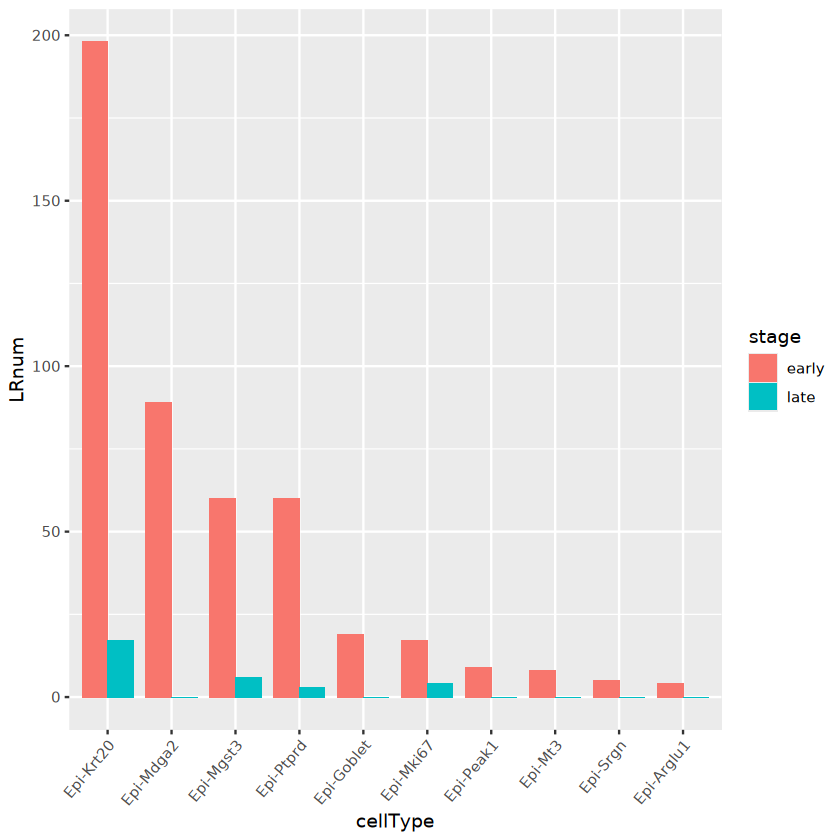

In [55]:
senderbarplot=senderstTablelong%>%ggplot(aes(cellType,LRnum,fill=stage))+
geom_bar(position="dodge",stat = "identity",width=0.8)+
theme(axis.text.x = element_text(angle = 50, vjust = 1, hjust = 1))
#coord_flip()+
#theme_classic()
senderbarplot

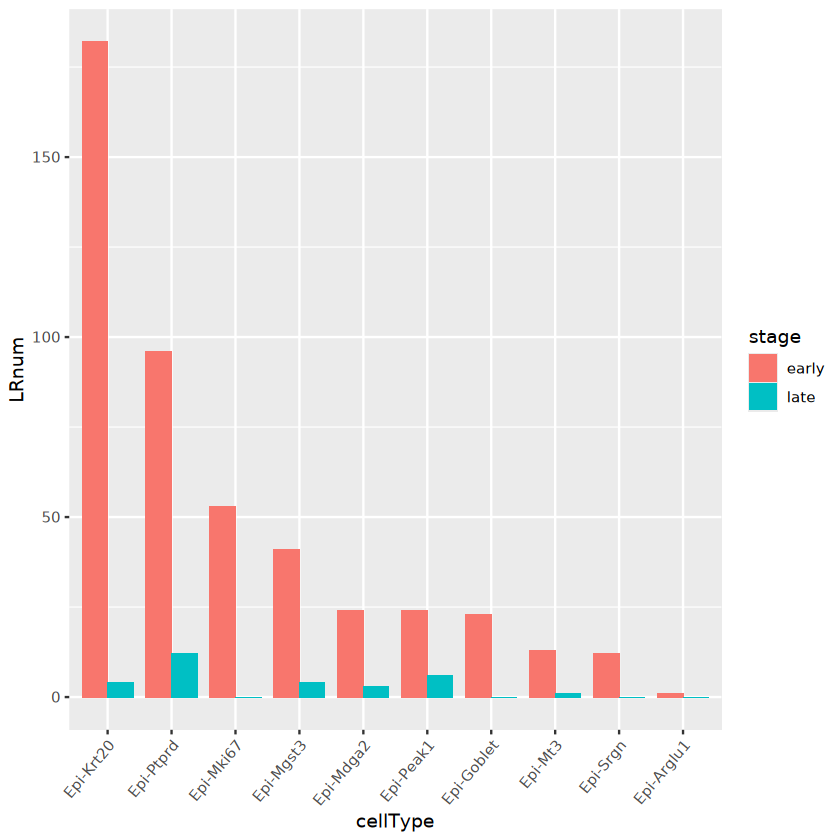

In [56]:
receiverplot=receiverstTablelong%>%ggplot(aes(cellType,LRnum,fill=stage))+
geom_bar(position="dodge",stat = "identity",width=0.8)+
theme(axis.text.x = element_text(angle = 50, vjust = 1, hjust = 1))
#coord_flip()+
#theme_classic()
receiverplot

In [57]:
ggsave(senderbarplot,filename = "results/plot/barplotcelltypesenderAVG.pdf",width = 4,height = 4)

In [59]:
ggsave(receiverplot,filename = "results/plot/barplotcelltypereceiverAVG.pdf",width = 4,height = 4)

# 14 LR barplot

In [3]:
barTable=read_xlsx("results/sampleLRselected.xlsx",sheet = "Sheet3")

In [4]:
barTable$stage=factor(barTable$stage,levels = c("late","early"))

In [5]:
head(barTable)

interaction_name,stage,LRavg
<chr>,<fct>,<dbl>
SEMA4G-PLXNB2,early,6.833333
LAMA3-(ITGA3+ITGB1),early,7.000000
LAMB3-(ITGA3+ITGB1),early,8.000000
LAMA3-DAG1,early,7.333333
LAMC2-(ITGA3+ITGB1),early,6.000000
LAMA3-(ITGA2+ITGB1),early,5.666667


In [ ]:
barTable$interaction_name

In [10]:
barTable$interaction_name=factor(barTable$interaction_name,
                                 levels = rev(c(
                                     'LAMC1-(ITGA3+ITGB1)',
                                     'LAMA3-(ITGA6+ITGB1)',
                                     'LAMA3-(ITGA6+ITGB4)',
                                     'LAMC1-(ITGA2+ITGB1)',
                                     'LAMA3-CD44',
                                     'LAMB3-(ITGA3+ITGB1)',
                                     'LAMA3-DAG1',
                                     'LAMA3-(ITGA3+ITGB1)',
                                     'LAMC2-(ITGA3+ITGB1)',
                                     'LAMB3-(ITGA2+ITGB1)',
                                     'LAMA3-(ITGA2+ITGB1)',
                                     'DSC2-DSG2',
                                     'CDH1-(ITGA1+ITGB1)',
                                     'SEMA4G-PLXNB2'                                   
)))

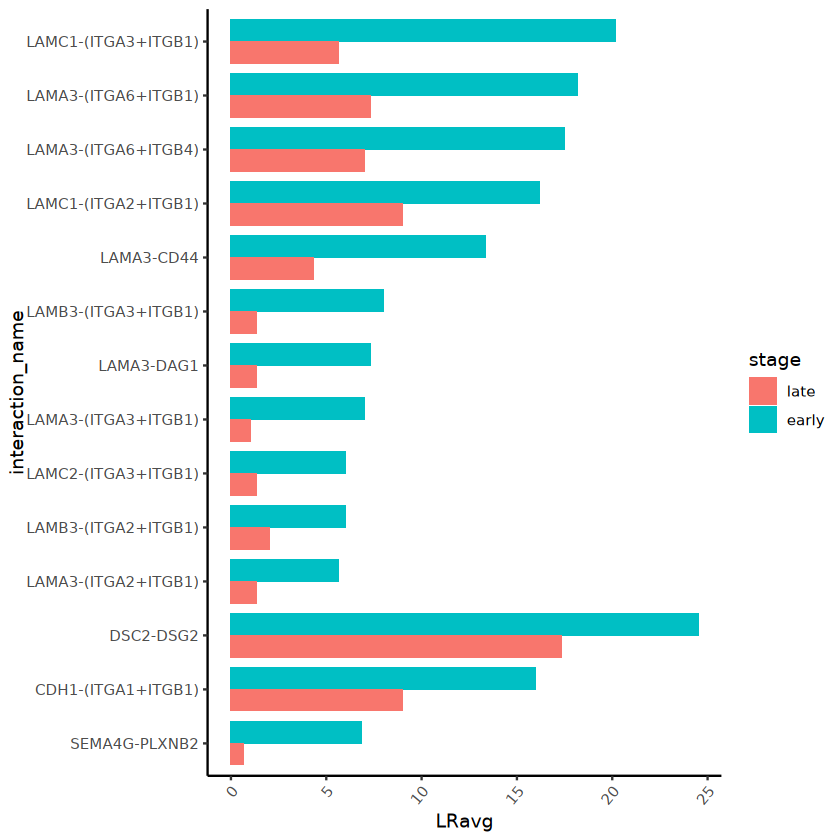

In [11]:
barplot=barTable%>%ggplot(aes(interaction_name,LRavg,fill=stage))+
geom_bar(position="dodge",stat = "identity",width=0.8)+
coord_flip()+
theme_classic()+
theme(axis.text.x = element_text(angle = 50, vjust = 1, hjust = 1))
barplot

In [ ]:
ggsave(barplot,filename = "results/plot/barplot.pdf",width = 4,height = 8)